In [91]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# counting steps in acceleration data
df = pd.read_csv('./Data/Linear Acceleration.csv')

In [93]:
# low-pass filter
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

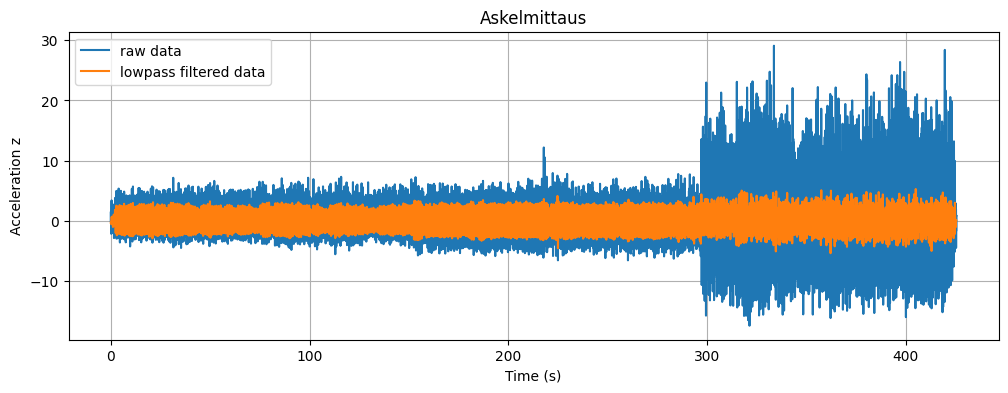

Askelmäärä laskettuna suodatetusta kiihtyvyysdatasta:  938.0


In [94]:
# filter with lowpass

signal = df['Linear Acceleration z (m/s^2)']
T_tot = df['Time (s)'].max()
n = len(df['Time (s)'])
fs = n / T_tot # sampling frequency

# filter parameters
nyq = fs/2
order = 3 
cutoff = 1/0.4 # cutoff frequency in Hz

# filtered signal
filtered_signal = butter_lowpass_filter(signal, cutoff, nyq, order)

# diagram
plt.figure(figsize=(12, 4))
plt.plot(df['Time (s)'], signal, label='raw data')
plt.plot(df['Time (s)'], filtered_signal, label='lowpass filtered data')
plt.title('Askelmittaus')
plt.ylabel('Acceleration z')
plt.xlabel('Time (s)')

#plt.axis([290,320,-30,30])

plt.grid()
plt.legend()
plt.show()

# counting steps
steps1 = 0
for i in range(n-1):
    if filtered_signal[i]/filtered_signal[i+1] < 0 :
        steps1 = steps1 + 1/2 # divide by 2 because both + and - crossings are counted


print('Askelmäärä laskettuna suodatetusta kiihtyvyysdatasta: ', np.round(steps1))


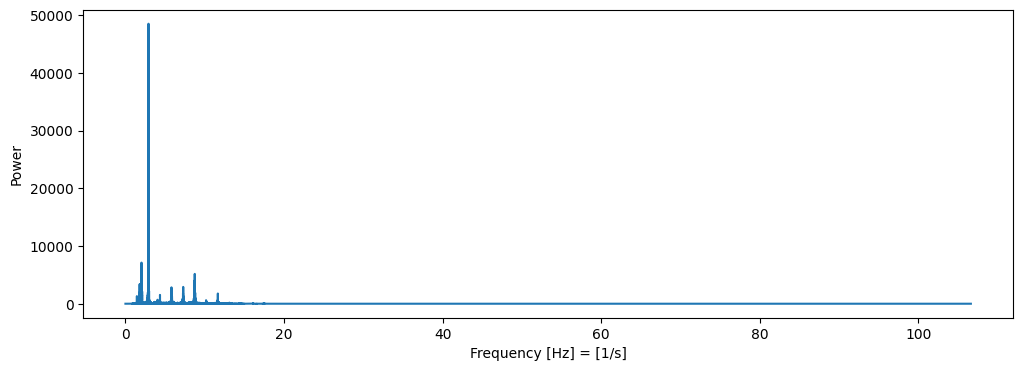

In [95]:
# steps count using fourier analysis

t = df['Time (s)'] # time
N = len(signal) # number of samples
dt = np.max(t)/N # sampling interval

#Fourier-analysis
fourier = np.fft.fft(signal,N) # Fourier-transform
psd = fourier*np.conj(fourier)/N # power spectrum
freq = np.fft.fftfreq(N,dt) # frequencies
L = np.arange(1,int(N/2)) # exclude 0 and negative frequencies

plt.figure(figsize=(12,4))
plt.plot(freq[L],psd[L].real)
plt.xlabel('Frequency [Hz] = [1/s]')
plt.ylabel('Power')
plt.show()

In [96]:
f_max = freq[L][psd[L] == np.max(psd[L])][0] # dominant frequency
T = 1/f_max 
steps2 =  f_max*np.max(t) # steps count

print('Askelmäärä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella: ', np.round(steps2))

Askelmäärä laskettuna kiihtyvyysdatasta Fourier-analyysin perusteella:  1239.0
